# An optimization using Newton method

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

## Defining functions

### Rosenbrock function

In [2]:
def rosenbrock(x,y):
    '''
    Calculate the rosenbrock function.   
    
    '''
    p1 = x
    p2 = y
    z = 100.*(p2-p1**2)**2 + (1.- p1)**2
    return z

In [3]:
def rosenbrock_grad(x,y):
    '''
    Calculate the gradient of rosenbrock function.
    '''
    p1 = x
    p2 = y
    J1 = -400.*p1*(p2-p1**2) - 2.*(1.- p1)
    J2 = 200.*(p2-p1**2)
    J = np.array([J1,J2])
    return J

In [4]:
def hessian_rosenbrock(x,y):
    '''
    Calculate the hessian matrix for rosenbrock function.
    '''
    p1 = x
    p2 = y
    H11 = -400.*p2 + 1200.*p1**2 + 2.
    H12 = -400.*p1 
    H21 = -400.*p1
    H22 = 200.
    
    H = np.array([H11,H12,H21,H22]).reshape(2,2)
    return H

### $p^T p$ function

In [5]:
def ptp(x,y):
    '''
    Calculate the rosenbrock function.   
    
    '''
    p1 = x
    p2 = y
    z = p1**2 + p2**2
    return z

In [6]:
def ptp_grad(x,y):
    '''
    Calculate the gradient of rosenbrock function.
    '''
    p1 = x
    p2 = y
    J1 = 2.*p1
    J2 = 2.*p2
    J = np.array([J1,J2])
    return J

In [7]:
def hessian_ptp(x,y):
    '''
    Calculate the hessian matrix for rosenbrock function.
    '''
    p1 = x
    p2 = y
    H11 = 2.
    H12 = 0. 
    H21 = 0.
    H22 = 2.
    
    H = np.array([H11,H12,H21,H22]).reshape(2,2)
    return H

## Parameters for calculating the rosenbrock function 

In [8]:
Nx = 20
Ny = 20

In [9]:
x = np.linspace(-5.,5.,num=Nx)
y = np.linspace(-10.,10.,num=Ny)
X,Y = np.meshgrid(x,y)

In [10]:
Z = rosenbrock(X,Y) 

In [11]:
Z_ros = histeq(Z).reshape(Nx,Ny)

## Parameters for calculating $p^T p$ function

In [12]:
Nx = 20
Ny = 20

In [13]:
x = np.linspace(-5.,5.,num=Nx)
y = np.linspace(-10.,10.,num=Ny)
X,Y = np.meshgrid(x,y)

In [14]:
Z = ptp(X,Y) 

In [15]:
Z_ptp = histeq(Z).reshape(Nx,Ny)

## Visuatization of the Rosenbrock function 


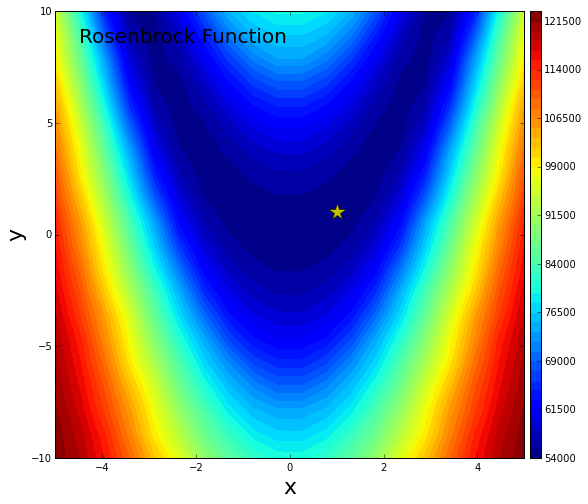

In [16]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ros, 50)
plt.plot(1.,1.,'y*',markersize=18)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()


## Visuatization of the $p^T p$ function 


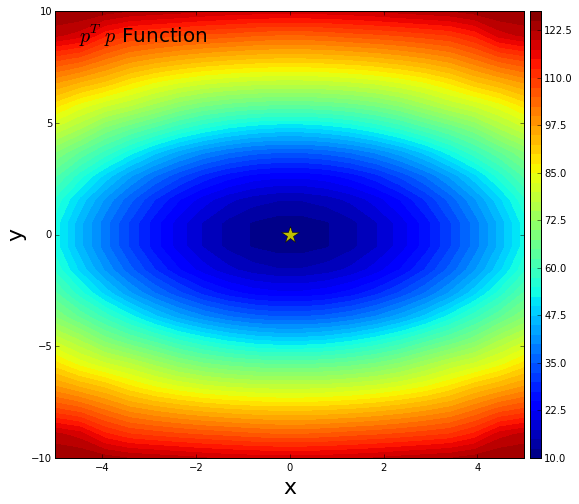

In [17]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ptp, 50)
plt.plot(0.,0.,'y*',markersize=18)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('$p^T p$ Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()


## Calculating the Newton method for Rosenbrock

In [18]:
itmax = 10

px = []
py = []

px0 = -1.
py0 = 7.

px.append(px0)
py.append(py0)

phi = []
it = []
for i in range(itmax):
    J = rosenbrock_grad(px[i],py[i])
    H = hessian_rosenbrock(px[i],py[i])
    H_inv = np.linalg.inv(H)
    f_pi = rosenbrock(px[i],py[i])
    
    px.append(px[i] - np.dot(H_inv[0],J))
    py.append(py[i] - np.dot(H_inv[1],J))
    
    f_plus = rosenbrock(px[i+1],py[i+1])
    
    phi.append(f_plus)
    it.append(i)
    
    print 'iteration:', i
    print 'p1 = %.2f | p2 = %.2f' % (px[i],py[i])
    print 'Rosenbrock value:', f_plus


iteration: 0
p1 = -1.00 | p2 = 7.00
Rosenbrock value: 4.00667501004
iteration: 1
p1 = -1.00 | p2 = 1.00
Rosenbrock value: 1601.77604472
iteration: 2
p1 = 1.00 | p2 = -3.00
Rosenbrock value: 1.23628807923e-06
iteration: 3
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 1.52840821268e-10
iteration: 4
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 1.23259516441e-32
iteration: 5
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 0.0
iteration: 6
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 0.0
iteration: 7
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 0.0
iteration: 8
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 0.0
iteration: 9
p1 = 1.00 | p2 = 1.00
Rosenbrock value: 0.0


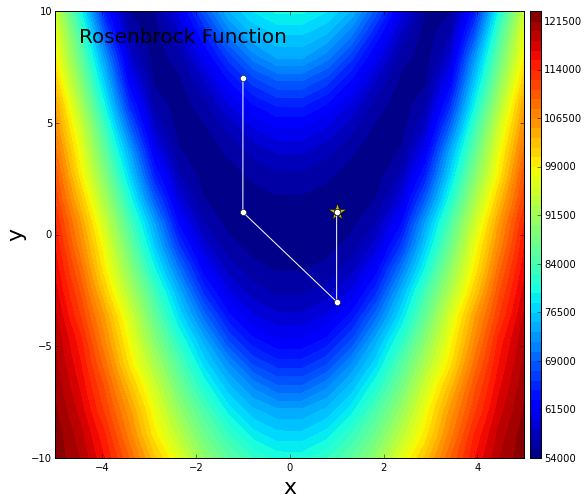

In [19]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ros, 50)
plt.plot(1.,1.,'y*',markersize=18)
plt.plot(px,py,'wo-')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()

## Calculating Newton Method for $p^T p$ function

In [20]:
itmax = 10

px_ptp = []
py_ptp = []

px0_ptp = -1.
py0_ptp = 7.

px_ptp.append(px0_ptp)
py_ptp.append(py0_ptp)

phi_ptp = []
it_ptp = []
for i in range(itmax):
    J = ptp_grad(px_ptp[i],py_ptp[i])
    H = hessian_ptp(px_ptp[i],py_ptp[i])
    H_inv = np.linalg.inv(H)
    f_pi = ptp(px_ptp[i],py_ptp[i])
    
    px_ptp.append(px_ptp[i] - np.dot(H_inv[0],J))
    py_ptp.append(py_ptp[i] - np.dot(H_inv[1],J))
    
    f_plus = ptp(px_ptp[i+1],py_ptp[i+1])
    
    phi_ptp.append(f_plus)
    it_ptp.append(i)
    
    print 'iteration:', i
    print 'p1 = %.2f | p2 = %.2f' % (px_ptp[i],py_ptp[i])
    print '$p^T p$ value:', f_plus

iteration: 0
p1 = -1.00 | p2 = 7.00
$p^T p$ value: 0.0
iteration: 1
p1 = 0.00 | p2 = 0.00
$p^T p$ value: 0.0
iteration: 2
p1 = 0.00 | p2 = 0.00
$p^T p$ value: 0.0
iteration: 3
p1 = 0.00 | p2 = 0.00
$p^T p$ value: 0.0
iteration: 4
p1 = 0.00 | p2 = 0.00
$p^T p$ value: 0.0
iteration: 5
p1 = 0.00 | p2 = 0.00
$p^T p$ value: 0.0
iteration: 6
p1 = 0.00 | p2 = 0.00
$p^T p$ value: 0.0
iteration: 7
p1 = 0.00 | p2 = 0.00
$p^T p$ value: 0.0
iteration: 8
p1 = 0.00 | p2 = 0.00
$p^T p$ value: 0.0
iteration: 9
p1 = 0.00 | p2 = 0.00
$p^T p$ value: 0.0


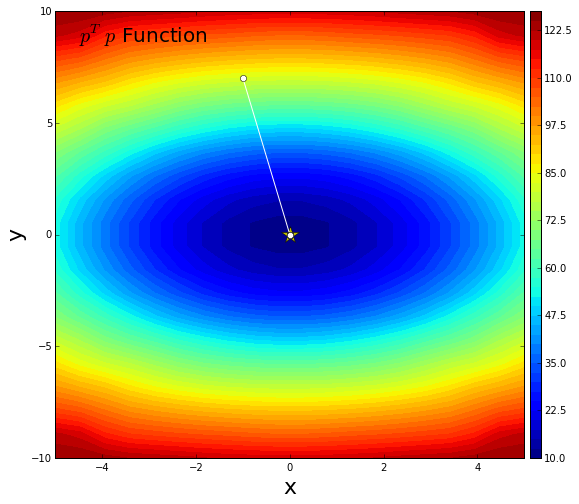

In [21]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ptp, 50)
plt.plot(0.,0.,'y*',markersize=18)
plt.plot(px_ptp,py_ptp,'wo-')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('$p^T p$ Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()

## Comparison between these two tests

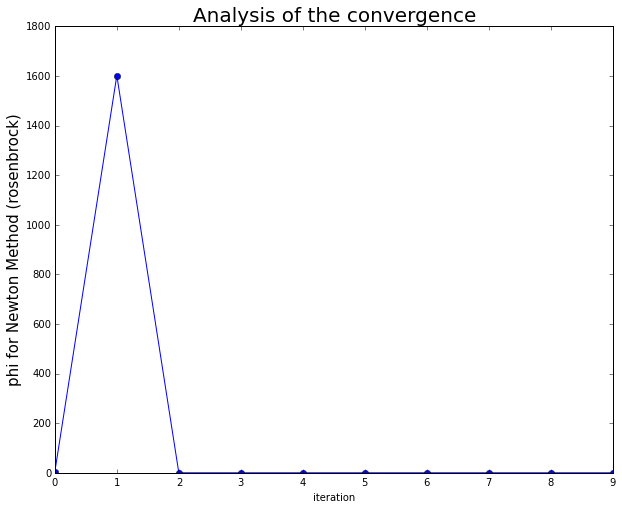

In [22]:
plt.figure(figsize=(10,8))

plt.plot(it, phi, 'o-')
plt.title('Analysis of the convergence',fontsize=20)
plt.ylabel('phi for Newton Method (rosenbrock)',fontsize=15)
plt.xlabel('iteration',)

plt.show()


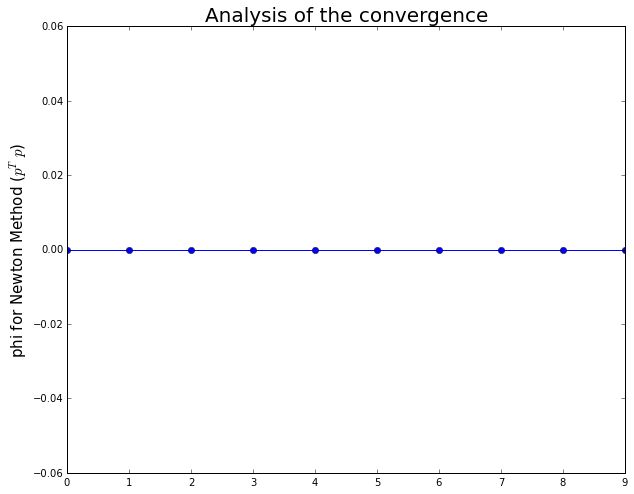

In [23]:
plt.figure(figsize=(10,8))

plt.plot(it_ptp, phi_ptp, 'o-')
plt.title('Analysis of the convergence',fontsize=20)
plt.ylabel('phi for Newton Method ($p^T p$)',fontsize=15)

plt.show()
